In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.animation import Funcanimation 
from mpl_toolkits import mplot3d

In [2]:
file = 'Documents/fortran/n_body.txt'
df = pd.read_csv(file, header= None, sep = ',', names = ['mass', 'x', 'y', 'z', 'Fx', 'Fy', 'Fz', 'ax', 'ay', 'az'] )

In [3]:
mass = df['mass']
x_positions = df['x']
y_positions = df['y']
z_positions = df['z']

N = len(np.unique(mass))
N_x_positions = [[] for _ in range(N)]
N_y_positions = [[] for _ in range(N)]
N_z_positions = [[] for _ in range(N)]

for i in range(len(x_positions)):
    mass_index = np.where(mass[i] == np.unique(mass))[0][0]
    N_x_positions[mass_index].append(x_positions[i])
    N_y_positions[mass_index].append(y_positions[i])
    N_z_positions[mass_index].append(z_positions[i])
    


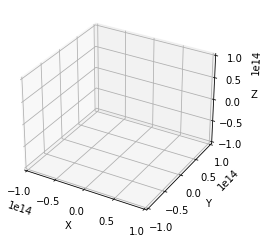

In [4]:
fig = plt.figure()
ax  = plt.axes(projection = "3d")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim([-10e13,10e13])
ax.set_ylim([-10e13,10e13])
ax.set_zlim([-10e13,10e13])

for i in range(N):
    x   = N_x_positions[i]
    y   = N_y_positions[i]
    z   = N_z_positions[i]
    
    ax.plot3D(x,y,z)    

plt.show()